#### Diego Fernando Valle Morales
##### 20003022

## Maldición Dimensionalidad

In [1]:
import numpy as np 
import pandas as pd 
import random,math 
import matplotlib.pyplot as plt 

In [2]:
# Definiendo las dimensiones en rango entre 1 a 250 con intervalos de 5
dimensiones = range(1, 251, 5)

In [4]:
# Generando números aleatorios entre cero y uno de distribución uniforme con las dimensiones indicadas en parámetro
def GeneraPuntoAleatorio(dimension): 
     return [random.random() for _ in range(dimension)] 

# Suma media cuadrada de los cuadrados en la distancia euclidiana (norma L2) entre dos puntos
def Distancia(a,b): 
     diff = [a_i-b_i for a_i,b_i in zip(a,b)] 
     sumaCuadrados = sum(a_i**2 for a_i in diff) 
     return math.sqrt(sumaCuadrados) 

# Calculando las distancias
def ComparacionDistanciasAleatorias(dimension,number_pairs): 
     return [Distancia(GeneraPuntoAleatorio(dimension),GeneraPuntoAleatorio(dimension)) 
            for _ in range(number_pairs)] 
    
def Media(x): 
     return sum(x) / len(x)

In [9]:
distanciasPromedio = [] 

dummy = np.empty((20,2)) 
dist = pd.DataFrame(dummy) 
dist.columns = ["Dimension","DistanciaPromedio"] 
 
random.seed(32) 
i = 0 
print("DIMENSIONES ->  DISTANCIA MEDIA")
for dims in dimensiones: 
    distancias = ComparacionDistanciasAleatorias(dims, 1000)   
    distanciasPromedio.append(Media(distancias))     
     
    dist.loc[i,"Dimension"] = dims 
    dist.loc[i,"DistanciaPromedio"] = Media(distancias) 
           
    print(dims," ->  ",Media(distancias))
    i = i+1

DIMENSIONES ->  DISTANCIA MEDIA
1  ->   0.33705782247773863
6  ->   0.9555827669677994
11  ->   1.3283569564425892
16  ->   1.6075651207915138
21  ->   1.8588093639961025
26  ->   2.0712658203341374
31  ->   2.2478814863456607
36  ->   2.438346737952669
41  ->   2.6071696867565506
46  ->   2.758042322066704
51  ->   2.909195764344551
56  ->   3.035673856099111
61  ->   3.168929860617719
66  ->   3.309524815130884
71  ->   3.4261426494427782
76  ->   3.5656649810808254
81  ->   3.6682499564648303
86  ->   3.782780935063196
91  ->   3.8879368400360628
96  ->   3.9961926767657534
101  ->   4.097507214555396
106  ->   4.18317981822568
111  ->   4.300778279171848
116  ->   4.4054849410364465
121  ->   4.490776057607807
126  ->   4.586834738064009
131  ->   4.66407564322312
136  ->   4.743885097542324
141  ->   4.834111690362107
146  ->   4.922061272699692
151  ->   5.0034359691705435
156  ->   5.084898571400418
161  ->   5.181988775378998
166  ->   5.253448234171819
171  ->   5.326738543884

No handles with labels found to put in legend.


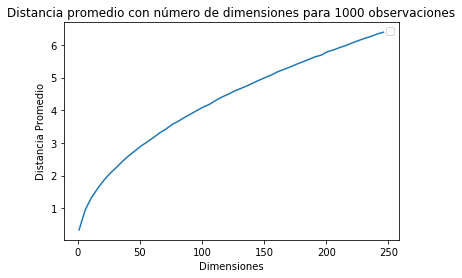

In [10]:
plt.plot(dist["Dimension"],dist["DistanciaPromedio"])
plt.title("Distancia promedio con número de dimensiones para 1000 observaciones")
plt.xlabel('Dimensiones') 
plt.ylabel('Distancia Promedio') 
plt.legend(loc='best') 
plt.show();

### Conclusión
Se puede observar que cuando se aumenta el número de dimensiones se incrementa la distancia promedio siguiendo una tendencia logaritmíca, por lo que se confirma que a mayor dimensionalidad, se requiere un conjunto de datos mayor para superar este inconveniente.